In [12]:
import requests
import pandas as pd
import json

In [13]:
data = pd.read_csv('data\data_prod.csv')

In [9]:
import flask_api
f = flask_api.features_prep(data.loc[[0]])

In [10]:
f.shape

(1, 158)

In [1]:
g = requests.get('https://scoring-app.azurewebsites.net/predict', json = data.loc[[0]].to_json())

NameError: name 'requests' is not defined

In [51]:
g = g.text

In [53]:
json.loads(g)

{'data': '{"CNT_CHILDREN":{"0":0.0},"AMT_INCOME_TOTAL":{"0":-0.1},"AMT_GOODS_PRICE":{"0":0.0},"DAYS_ID_PUBLISH":{"0":0.9390196835},"FLAG_MOBIL":{"0":0.0},"FLAG_EMP_PHONE":{"0":0.0},"FLAG_WORK_PHONE":{"0":0.0},"FLAG_CONT_MOBILE":{"0":0.0},"FLAG_PHONE":{"0":0.0},"FLAG_EMAIL":{"0":1.0},"REGION_RATING_CLIENT":{"0":0.0},"REGION_RATING_CLIENT_W_CITY":{"0":0.0},"HOUR_APPR_PROCESS_START":{"0":1.5},"LIVE_REGION_NOT_WORK_REGION":{"0":0.0},"REG_CITY_NOT_LIVE_CITY":{"0":0.0},"EXT_SOURCE_3":{"0":-1.7136204979},"YEARS_BEGINEXPLUATATION_AVG":{"0":-17.8},"FLOORSMAX_AVG":{"0":-0.0417},"LIVINGAREA_AVG":{"0":-0.02505},"YEARS_BEGINEXPLUATATION_MODE":{"0":-16.8},"LIVINGAREA_MODE":{"0":-0.0209},"YEARS_BEGINEXPLUATATION_MEDI":{"0":-17.8},"LIVINGAREA_MEDI":{"0":-0.0246},"OBS_30_CNT_SOCIAL_CIRCLE":{"0":0.0},"DEF_30_CNT_SOCIAL_CIRCLE":{"0":0.0},"DEF_60_CNT_SOCIAL_CIRCLE":{"0":0.0},"FLAG_DOCUMENT_2":{"0":0.0},"FLAG_DOCUMENT_3":{"0":0.0},"FLAG_DOCUMENT_5":{"0":0.0},"FLAG_DOCUMENT_8":{"0":0.0},"DAYS_EMPLOYED_PERC"

In [21]:
import numpy as np
np.array(f['shapley_values']).shape

(1, 158)

In [22]:
np.array(f['shapley_base_values']).shape

(1,)

In [13]:
t = pd.read_json(data.loc[[0]].to_json())

In [19]:
pipeline.predict(data) > 0

array([False, False, False, ..., False, False, False])

In [9]:
json.loads(g.text)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [120]:
g = requests.get('http://127.0.0.1:5000/api/shap', json = test_.head(1).to_json())

In [123]:
gg = json.loads(g.text)

In [124]:
bb = gg['shapley_values']

In [4]:
import shap

In [1]:
import joblib

In [2]:
pipeline = joblib.load('pipeline-xgboost-scoring')

In [28]:
pipeline[0].named_transformers_['nums_columns'].transform(X_train)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'Cash loans'

In [6]:
pipeline.predict_proba(data.loc[[0]])

array([[0.6688208, 0.3311792]], dtype=float32)

In [22]:
import pandas as pd
X_train = pd.read_csv('data\X_train.csv')
X_test = pd.read_csv('data\X_test.csv')
y_train = pd.read_csv('data\y_train.csv')
y_test = pd.read_csv('data\y_test.csv')

In [43]:
explainer = shap.TreeExplainer(pipeline[1])

In [45]:
d = pipeline[0].transform(X_test.loc[[0]])

In [46]:
test = explainer(d)

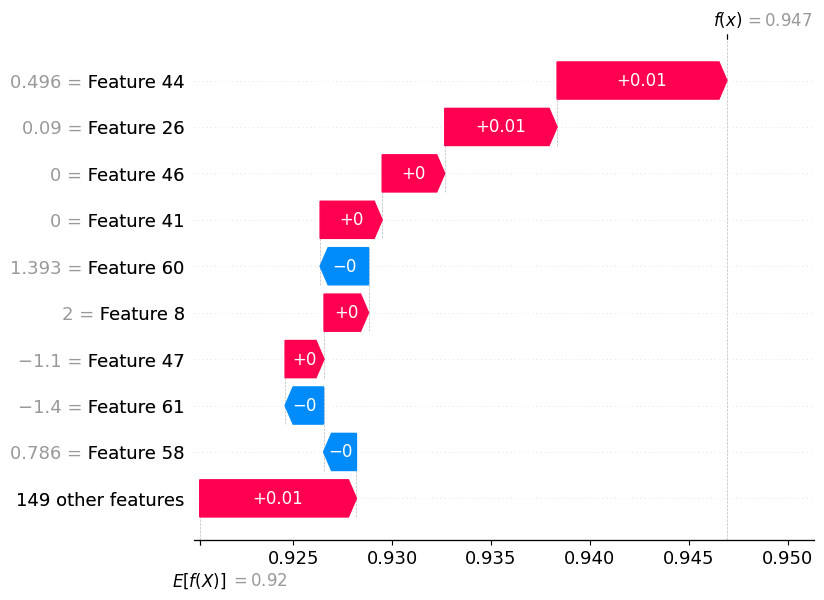

In [50]:
shap.waterfall_plot(test[0][:, 0])

In [37]:
shap.initjs()

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer_fr.expected_value[0],shap_values[0][0])

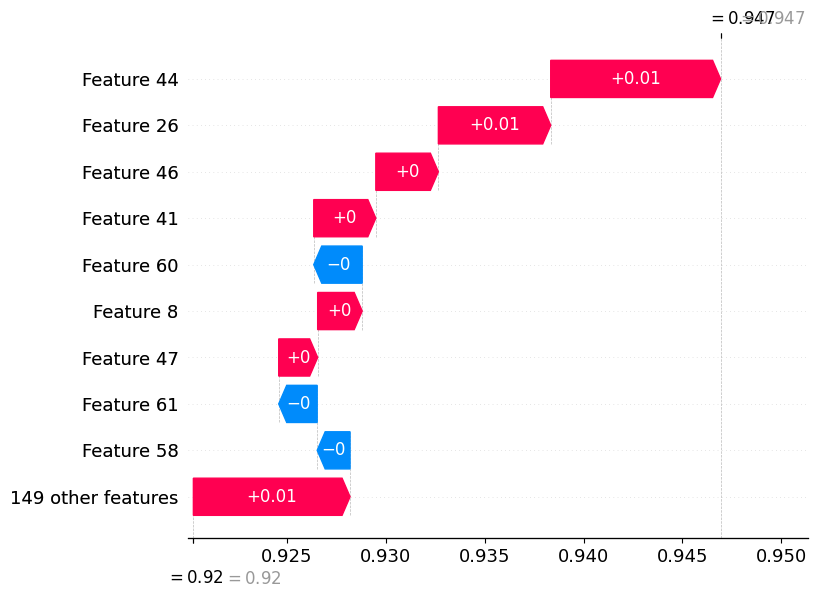

In [41]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], explainer.shap_values(d)[0][0])

In [38]:
shap.force_plot(explainer.expected_value[0], explainer.shap_values(d)[0])

In [31]:
value = test.values
base_value = test.base_values
data = test.data

In [116]:

n = value.tolist()

In [118]:
import numpy as np

In [119]:
np.array(n)

array([[[ 4.56649921e-04, -4.56649921e-04],
        [ 8.62296393e-05, -8.62296393e-05],
        [ 1.16405763e-04, -1.16405763e-04],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.34170184e-03, -1.34170184e-03],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 2.25053672e-03, -2.25053672e-03],
        [-1.11121741e-04,  1.11121741e-04],
        [ 4.47440314e-06, -4.47440314e-06],
        [ 1.95541292e-05, -1.95541292e-05],
        [ 6.10414063e-05, -6.10414063e-05],
        [-1.96598790e-04,  1.96598790e-04],
        [ 5.91120830e-04, -5.91120830e-04],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.55973809e-04, -1.55973809e-04],
        [ 2.96034866e-05, -2.96034866e-05],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.85440326e-04, -1.85440326e-04],
        [ 1.14140575e-04, -1.141

In [51]:
v = shap.Explanation(value, base_value, data)

In [129]:
v

.values =
array([[[ 4.56649921e-04, -4.56649921e-04],
        [ 8.62296393e-05, -8.62296393e-05],
        [ 1.16405763e-04, -1.16405763e-04],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.34170184e-03, -1.34170184e-03],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 2.25053672e-03, -2.25053672e-03],
        [-1.11121741e-04,  1.11121741e-04],
        [ 4.47440314e-06, -4.47440314e-06],
        [ 1.95541292e-05, -1.95541292e-05],
        [ 6.10414063e-05, -6.10414063e-05],
        [-1.96598790e-04,  1.96598790e-04],
        [ 5.91120830e-04, -5.91120830e-04],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.55973809e-04, -1.55973809e-04],
        [ 2.96034866e-05, -2.96034866e-05],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00],
        [ 1.85440326e-04, -1.85440326e-04],
        [ 1.14140575e-

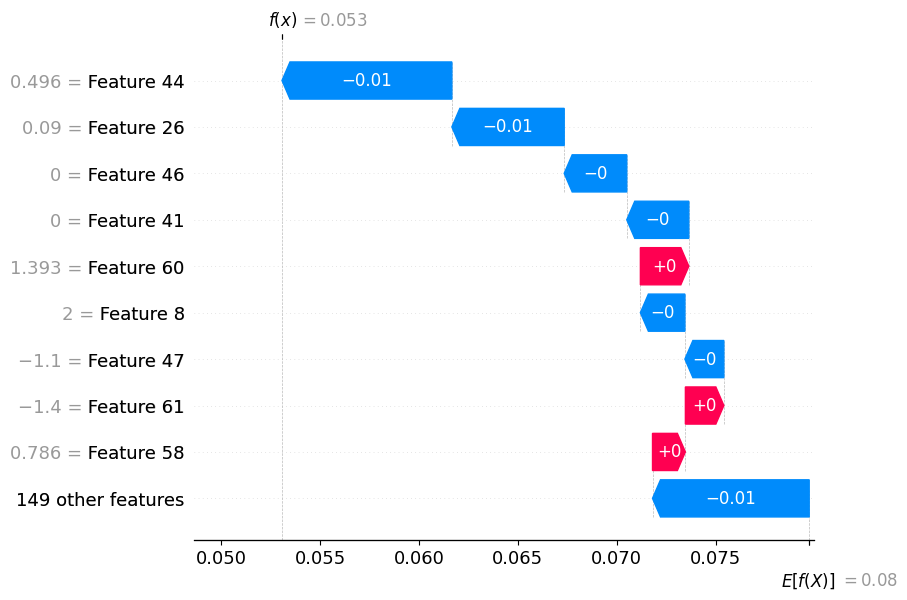

In [55]:
shap.waterfall_plot(v[0][:, 1])

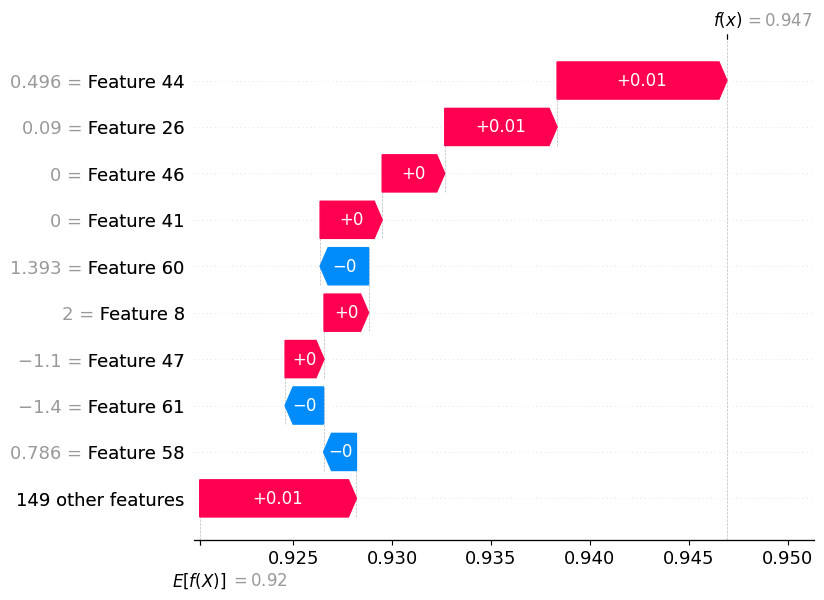

In [57]:
shap.waterfall_plot(v[0][:, 0])

In [26]:
shap.bar_plot(explainer.shap_values(d)[0])

IndexError: index 44 is out of bounds for axis 0 with size 1

In [89]:
def features_prep(df):
    data = pipeline[0].transform(df)
    return data

In [88]:
k = test_.head(1).to_json()

In [104]:
df = pd.DataFrame(shapley_values[0])

In [102]:
df

,0,1
0,0.000457,-0.000457
1,0.000086,-0.000086
2,0.000116,-0.000116
3,0.000000,0.000000
4,0.001342,-0.001342
...,...,...
153,0.000179,-0.000179
154,0.000134,-0.000134
155,0.000270,-0.000270
156,0.000003,-0.000003
